In [20]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
path = "/content/gdrive/MyDrive/Colab_Notebooks/spectograms"
# load image
X = []
y = []
for i in range(10):
    os.chdir(f"{path}/{i}")
    for file in os.listdir():
        image = cv2.imread(f"{path}/{i}/{file}")
        try:
            image_resized = cv2.resize(image,(128, 96))
        except:
            break
        # convert image to numpy array
        X.append(image_resized)
        y.append(i)
X = np.array(X)
y = np.array(y)
print(X[0].shape)

(96, 128, 3)


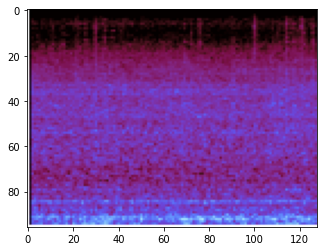

In [21]:
plt.imshow(X[0])
plt.show()

In [22]:
# First, create X_train, y_train and X_temporary and y_temporary datasets from X and y.
X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size=0.8)

# Using the X_temporary and y_temporary dataset we just created create validation and test datasets.
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5)

In [23]:
# Print the lengths of the X, X_train, X_val and X_test
print(f'Length of the dataset: {len(X)}')
print(f'Length of the training datasets: {len(X_train)}')
print(f'Length of the validation datasets: {len(X_val)}')
print(f'Length of the test datasets: {len(X_test)}')

Length of the dataset: 8732
Length of the training datasets: 6985
Length of the validation datasets: 873
Length of the test datasets: 874


Normalization

In [24]:
# Divide each dataset by 255
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

**Saving data sets to locale**

In [25]:
import pickle

os.chdir(f"/content/gdrive/MyDrive/Colab_Notebooks/DataSets-UrbanSounds_Classification/")

with open('X_val.pickle', 'wb') as f:
    pickle.dump(X_val, f)

with open('y_val.pickle', 'wb') as f:
    pickle.dump(y_val, f)

with open('X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

with open('X_train.pickle', 'wb') as f:
    pickle.dump(X_train, f)

with open('y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)